___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [56]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In [57]:
import scipy

In [58]:
scipy.__version__

'1.11.4'

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

<a id="part_1"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> Tasks </p>

### <a href="#part_1" > 1. Exploratory Data Analysis (EDA) </a>  

  - <a href="#part_11" style="color: black;">  i. Import Libraries </a>  
  - <a href="#part_12" style="color: black;">  ii. Ingest Data  </a> 
  - <a href="#part_13" style="color: black;">  iii. Explore Data  </a>  
  - <a href="#part_14" style="color: black;">  iv. Outlier Detection </a>  
  - <a href="#part_15" style="color: black;">  v.  Drop unnecessary features </a>    

### <a href="#part_2"> 2. Data Preprocessing </a>  
  - <a href="#part_21" style="color: black;">  Scale (if needed) </a>  
  - <a href="#part_22" style="color: black;">  Separete the data frame for evaluation purposes  </a> 

### <a href="#part_3"> 3. Multi-class Classification </a>
  - <a href="#part_31" style="color: black;">  Import libraries </a>  
  - <a href="#part_32" style="color: black;">  Implement SVM Classifer  </a>
  - <a href="#part_33" style="color: black;">  Implement Decision Tree Classifier </a>  
  - <a href="#part_34" style="color: black;">  Implement Random Forest Classifer  </a>
  - <a href="#part_35" style="color: black;">  Implement XGBoost Classifer </a>  
  - <a href="#part_36" style="color: black;">  Compare The Models  </a>

### <a href="#part_4"> 4. SMOTE </a>
 - <a href="#part_41" style="color: black;">  Apply Imbalance Learning Techniques  </a>
 
### <a href="#part_5"> 5. SHAP </a>
 - <a href="#part_51" style="color: black;">  Apply Feature selection with SHAP </a> 


<a id="part_1"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> EDA</p>
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

<a id="part_11"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > i. Import Libraries </p> 
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [59]:
import numpy as np
import pandas as pd 
from scipy import stats, integrate, optimize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import get_scorer_names
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
import pickle

In [60]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 108)

<a id="part_12"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > ii. Ingest Data from links below and make a dataframe </p> 
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [61]:
# Import the dataset
df_m = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_f= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')



<a id="part_13"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > iii. Explore Data </p> 

In [62]:
#Female 
df_f.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [63]:
#Male 
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [64]:
df_f.shape

(1986, 108)

In [65]:
df_m.shape

(4082, 108)

In [66]:
df = pd.concat([df_m,df_f])

In [67]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,

In [68]:
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

In [69]:
df = pd.concat([df_m,df_f])
df.shape

(6068, 108)

In [70]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [71]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                    int6

In [72]:
df.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [73]:
df.isna().sum().any()

True

In [74]:
df.Ethnicity.value_counts(dropna=False)

Ethnicity
NaN                               4647
Mexican                            357
Puerto Rican                       183
Caribbean Islander                 124
Filipino                            67
                                  ... 
Lakota Sioux                         1
Cuban Salvadoran                     1
Caribbean Islander Dominican         1
Azorean                              1
Apache Blackfoot Cherokee Crow       1
Name: count, Length: 210, dtype: int64

In [75]:
# Ethnicity column has 4647 nan values so we drop this column df.drop(columns='Ethnicity',inplace=True)

In [112]:
df.drop("Ethnicity", axis = 1, inplace = True)

In [113]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,4-Oct-10,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,4-Oct-10,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,Male,4-Oct-10,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,Male,12-Oct-10,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,Male,12-Oct-10,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [77]:
df.isnull().sum().any()

True

In [78]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [79]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


SubjectNumericRace – Subject Numeric Race; a single or multi-digit code 
indicating a subject’s self-reported race or races (verified through interview). 
Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 
6 = Pacific Islander, 8 = Other

DODRace – Department of Defense Race; a single digit indicating a subject’s 
self-reported preferred single race where selecting multiple races is not an option. 
This variable is intended to be comparable to the Defense Manpower Data Center 
demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 
5 = Native American, 6 = Pacific Islander, 8 = Other

In [80]:

# Count the values in the 'DODRace' column
race_counts = df['DODRace'].value_counts()

# Filter out the 'DODRace' values that have counts less than 500
filtered_races = race_counts[race_counts >= 500].index

# Keep only the rows where 'DODRace' is in the filtered_races
df = df[df['DODRace'].isin(filtered_races)]

In [81]:
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [82]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [83]:
df.duplicated().sum()

0

Heightin – Height in Inches; self-reported, comparable to measured “stature” Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg

In [84]:
df[['Weightlbs','weightkg']]

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
1981,180,832
1982,150,717
1983,168,762
1984,133,632


In [85]:
df.Weightlbs.value_counts()

Weightlbs
170    224
180    219
150    216
175    204
160    203
      ... 
0        1
274      1
295      1
292      1
101      1
Name: count, Length: 188, dtype: int64

In [86]:
df.weightkg.value_counts()

weightkg
791     24
842     23
882     23
695     22
809     21
        ..
1301     1
1202     1
1219     1
1265     1
464      1
Name: count, Length: 774, dtype: int64

In [87]:
df. weightkg = df.weightkg / 10

In [88]:
df = df[(df.Weightlbs >=90) & (df.Weightlbs <= 220)]
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,2,21,77,213,Right hand
...,...

In [89]:
df.Heightin.value_counts(dropna = False)

Heightin
69    566
66    516
70    503
68    493
67    477
71    455
72    382
64    368
65    297
63    248
73    221
62    208
74    165
61     89
60     72
75     70
76     37
59     29
77     19
78      9
80      6
57      5
58      4
79      3
81      2
94      1
56      1
87      1
86      1
Name: count, dtype: int64

In [90]:
df[['Heightin', 'stature']]

,Heightin,stature
0,71,1776
1,68,1702
2,68,1735
3,66,1655
4,77,1914
...,...,...
1981,67,1687
1982,63,1613
1983,66,1644
1984,63,1616


In [91]:
df = df[(df.Heightin >= 58) & (df.Heightin <= 84)]

In [92]:
df.drop(["Weightlbs"], axis = 1, inplace=True)

In [93]:
df.drop(["Heightin"], axis = 1, inplace=True)

In [94]:
df.reset_index(drop=True, inplace=True)

In [95]:
df.shape

(5239, 105)

In [96]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,DODRace,Age,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,1,41,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,1,35,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,2,42,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,1,31,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,2,21



<a id="part_14"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > iv. Outlier Detection </p> 

In [97]:
num_columns = df.select_dtypes(include='number').columns
df.select_dtypes(include='number')


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,1,41
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,1,35
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,2,42
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,1,31
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

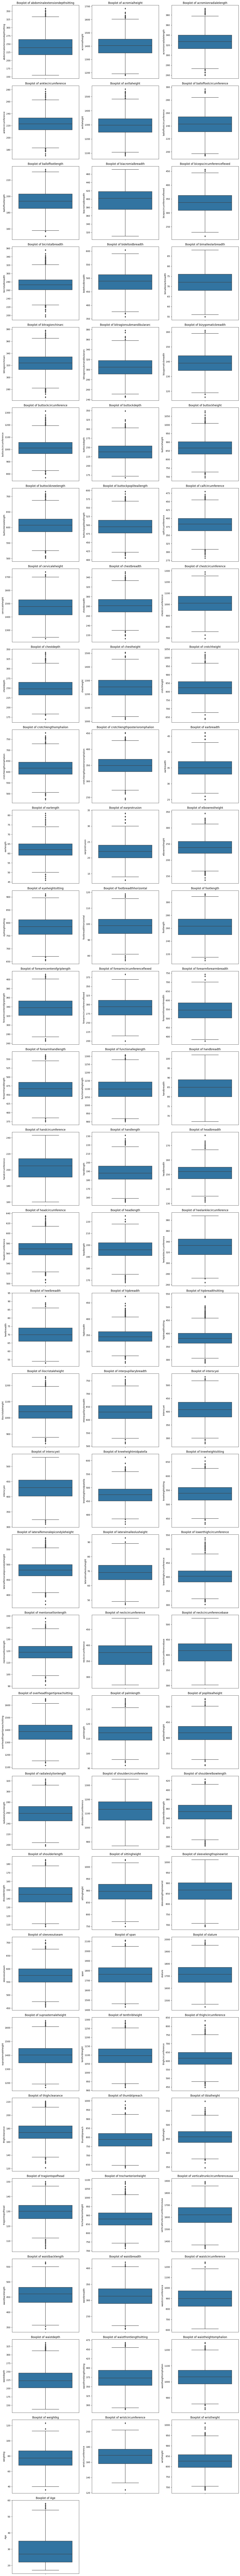

In [126]:
# Plotting box plots for all numeric columns in a 3-column layout
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [99]:
df.select_dtypes(include='object')

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
5234,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
5235,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
5236,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
5237,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


In [100]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 275 unique value
SubjectsBirthLocation has 133 unique value
Ethnicity has 148 unique value
WritingPreference has 3 unique value



<a id="part_15"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > v. Drop unnecessary features </p> 

# Installation 

In [101]:
df.Installation.value_counts()

Installation
Camp Shelby       1020
Fort Bliss         829
Fort Gordon        615
Fort McCoy         381
Camp Atterbury     366
Fort Hood          360
Fort Huachuca      360
Fort Lee           352
Fort Bragg         348
Fort Drum          316
Fort Stewart       291
Fort Rucker          1
Name: count, dtype: int64

In [102]:
df.drop(columns='Installation', axis = 1 , inplace=True)
# iNSTALLATION has many unique value and does not effect directly
# DODRace thus, we drop this column

# Date

In [103]:
df.Date.nunique()# date column has many unique values

253

In [124]:
df.drop(columns='Date', inplace = True)

# Component

In [104]:
df.Component.nunique()# date column has many unique values

3

In [105]:
df.Component.value_counts()

Component
Regular Army           2689
Army National Guard    2356
Army Reserve            194
Name: count, dtype: int64

In [106]:
df.PrimaryMOS.value_counts()

PrimaryMOS
11B     576
88M     276
92A     260
91B     197
68W     193
       ... 
882A      1
94Y       1
352P      1
351B      1
76B       1
Name: count, Length: 275, dtype: int64

In [107]:
df.Branch.value_counts()

Branch
Combat Service Support    2741
Combat Arms               1345
Combat Support            1153
Name: count, dtype: int64

In [120]:
df.drop(columns= ["Component","PrimaryMOS", 'Branch'], inplace= True)

KeyError: "['Component', 'PrimaryMOS', 'Branch'] not found in axis"

In [119]:
df.drop(columns = 'subjectid', inplace = True)

KeyError: "['subjectid'] not found in axis"

In [110]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

DODRace
White       3425
Black       1174
Hispanic     640
Name: count, dtype: int64

In [114]:
df.select_dtypes(include = 'O')

,Gender,Date,SubjectsBirthLocation,DODRace,WritingPreference
0,Male,4-Oct-10,North Dakota,White,Right hand
1,Male,4-Oct-10,New York,White,Left hand
2,Male,4-Oct-10,New York,Black,Left hand
3,Male,12-Oct-10,Wisconsin,White,Right hand
4,Male,12-Oct-10,North Carolina,Black,Right hand
...,...,...,...,...,...
5234,Female,5-Apr-12,Texas,Hispanic,Right hand
5235,Female,5-Apr-12,Texas,Hispanic,Right hand
5236,Female,5-Apr-12,Texas,Black,Right hand
5237,Female,5-Apr-12,Texas,Hispanic,Right hand


In [115]:
df.SubjectsBirthLocation.value_counts(dropna = True)

SubjectsBirthLocation
California       384
New York         374
Texas            355
Indiana          228
Florida          194
                ... 
Ivory Coast        1
Belarus            1
New Zealand        1
South America      1
Denmark            1
Name: count, Length: 133, dtype: int64

In [116]:
df = df[df['SubjectsBirthLocation'].map(df['SubjectsBirthLocation'].value_counts()) >= 10]

In [118]:
df.shape

(5028, 99)

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5028.0,241.485680,32.651166,155.0,217.00,239.0,264.0,358.0
acromialheight,5028.0,1400.636436,74.110766,1181.0,1347.75,1404.0,1453.0,1683.0
acromionradialelength,5028.0,326.349443,19.593192,260.0,313.00,327.0,340.0,393.0
anklecircumference,5028.0,223.179594,14.524112,170.0,213.00,223.0,233.0,281.0
axillaheight,5028.0,1295.363365,68.128141,1082.0,1248.00,1297.0,1343.0,1553.0
balloffootcircumference,5028.0,242.423628,15.755212,194.0,231.00,243.0,254.0,297.0
balloffootlength,5028.0,193.823787,12.832348,151.0,185.00,194.0,203.0,233.0
biacromialbreadth,5028.0,396.578162,28.628105,311.0,375.00,402.0,418.0,471.0
bicepscircumferenceflexed,5028.0,335.662689,37.063996,216.0,309.00,337.0,363.0,456.0
bicristalbreadth,5028.0,273.016309,18.285606,197.0,261.00,273.0,285.0,356.0


In [125]:
df.select_dtypes(include='O').describe()

,Gender,SubjectsBirthLocation,DODRace,WritingPreference
count,5028,5028,5028,5028
unique,2,57,3,3
top,Male,California,White,Right hand
freq,3259,384,3328,4436


<a id="part_2"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> Data Preprocessing</p>

- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

# Train | Test Split

In [127]:
X = df.drop(columns = 'DODRace', axis = 1)
y = df.DODRace

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 101)


<a id="part_21"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > Scaling </p> 

# OrdinalEncoder and Categoric Variables

In [129]:
cat = X_train.select_dtypes('O').columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

# Modeling with Pipeline

In [131]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

column_trans = make_column_transformer((onehot_enc, cat),
                                       remainder = 'passthrough',
                                       verbose_feature_names_out = False).set_output(transform = 'pandas')
                                        

In [132]:
column_trans.fit_transform(X_train)

,Gender_Female,Gender_Male,SubjectsBirthLocation_Alabama,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_California,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Florida,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,...,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
2304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149,584,206,358,81,341,367,1040,680,410,450,505,557,505,74,393,130,371,411,1415,121,447,273,1131,370,157,923,907,601,1858,1765,1438,1125,586,160,839,484,133,882,1578,485,337,901,210,387,1070,76.6,175,827,22
540,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,162,578,199,337,78,337,360,984,695,406,427,449,528,452,74,410,127,406,442,1288,108,405,251,1158,337,154,880,850,554,1688,1674,1343,1033,612,185,777,435,139,838,1562,433,308,886,222,350,1002,77.1,174,767,36
3659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145,560,185,297,64,337,376,998,590,328,370,455,513,463,67,362,108,308,350,1282,102,392,240,996,334,130,835,794,537,1617,1603,1314,1046,590,163,690,447,118,846,1543,395,283,777,169,346,974,56.1,146,778,24
1057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,161,594,206,364,74,396,421,1095,690,421,445,496,571,505,74,440,120,395,441,1480,124,437,277,1169,378,145,936,925,617,1878,1785,1472


<a id="part_22"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > Separeting the data frame for evaluation purposes </p> 

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [133]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [134]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

### Vanilla Logistic Model

In [135]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# With Default Parameters

In [136]:
y_pred = pipe_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [137]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[7.18787795e-03, 1.39705867e-01, 8.53106255e-01],
       [1.63380092e-02, 1.53587471e-03, 9.82126116e-01],
       [1.67061592e-02, 9.69743187e-03, 9.73596409e-01],
       ...,
       [2.79729734e-02, 1.22298375e-02, 9.59797189e-01],
       [1.01302008e-02, 2.81164622e-01, 7.08705177e-01],
       [9.38140866e-04, 2.03635743e-03, 9.97025502e-01]])

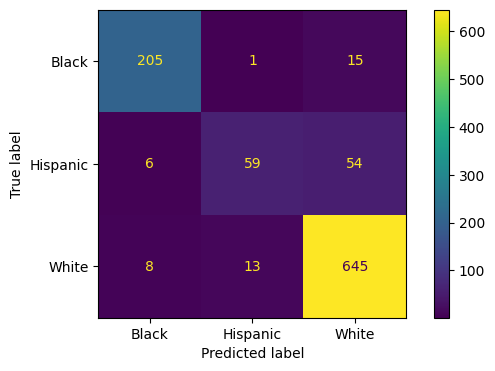

In [138]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [139]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Test_Set')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('Train_Set')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [140]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[205   1  15]
 [  6  59  54]
 [  8  13 645]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93       221
    Hispanic       0.81      0.50      0.61       119
       White       0.90      0.97      0.93       666

    accuracy                           0.90      1006
   macro avg       0.88      0.80      0.83      1006
weighted avg       0.90      0.90      0.90      1006


Train_Set
[[ 813   14   59]
 [  24  281  169]
 [  20   51 2591]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       886
    Hispanic       0.81      0.59      0.69       474
       White       0.92      0.97      0.95      2662

    accuracy                           0.92      4022
   macro avg       0.89      0.83      0.85      4022
weighted avg       0.91      0.92      0.91      4022



# Cross Validate

In [141]:
from sklearn.model_selection import cross_validate

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.906765
train_accuracy           0.917095
test_precision_macro     0.879669
train_precision_macro    0.896033
test_recall_macro        0.809428
train_recall_macro       0.827445
test_f1_macro            0.836856
train_f1_macro           0.855054
dtype: float64

# Cross Validate for Hispanic

In [142]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_Hispanic = make_scorer(f1_score,pos_label = 'Hispanic', average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label = 'Hispanic', average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label = 'Hispanic', average = None, labels =["Hispanic"])


scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [143]:
from sklearn.model_selection import StratifiedKFold

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scoring = {
           "f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic
}

cv = StratifiedKFold(n_splits =10, shuffle = True, random_state = 101)

scores = cross_validate(pipe_model, X, y, scoring = scoring, cv = cv, return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1,11))

print(df_scores.mean()[2:])

test_f1_Hispanic            0.641714
train_f1_Hispanic           0.675482
test_precision_Hispanic     0.781679
train_precision_Hispanic    0.819976
test_recall_Hispanic        0.546412
train_recall_Hispanic       0.574295
dtype: float64


In [144]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.648397
train_f1_Hispanic           0.684563
test_precision_Hispanic     0.783387
train_precision_Hispanic    0.818903
test_recall_Hispanic        0.554787
train_recall_Hispanic       0.588141
dtype: float64

### Logistic Model GridsearchCV

In [145]:
f1_Hispanic = make_scorer(f1_score,pos_label = 'Hispanic', average = None, labels =["Hispanic"])

In [146]:
operations = [
    ('OrdinalEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression())
]

pipe_model = Pipeline(steps=operations)


penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}


In [147]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

grid_search = GridSearchCV(pipe_model, param_grid, cv=cv, scoring=f1_Hispanic, return_train_score=True)

In [148]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']))

In [149]:
grid_search.best_params_

{'logistic__C': 5, 'logistic__penalty': 'l2'}

In [150]:
grid_search.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=5))])

In [151]:
pd.DataFrame(grid_search.cv_results_).loc[grid_search.best_index_, ['mean_test_score', 'mean_train_score']]

mean_test_score      0.66955
mean_train_score    0.707722
Name: 7, dtype: object

In [152]:
y_pred = grid_search.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

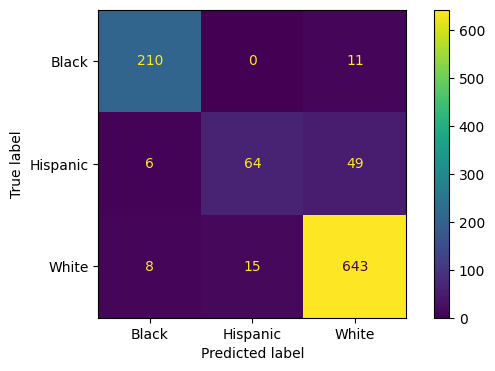

In [153]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

In [154]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[210   0  11]
 [  6  64  49]
 [  8  15 643]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94       221
    Hispanic       0.81      0.54      0.65       119
       White       0.91      0.97      0.94       666

    accuracy                           0.91      1006
   macro avg       0.89      0.82      0.84      1006
weighted avg       0.91      0.91      0.91      1006


Train_Set
[[ 826   14   46]
 [  21  301  152]
 [  23   60 2579]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94       886
    Hispanic       0.80      0.64      0.71       474
       White       0.93      0.97      0.95      2662

    accuracy                           0.92      4022
   macro avg       0.89      0.85      0.87      4022
weighted avg       0.92      0.92      0.92      4022



In [155]:
operations = [
    ('OneHotEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(class_weight = 'balanced', C = 5, solver ='liblinear',
                                    penalty = 'l2', 
                                    random_state = 101))
]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                       X_train,
                       y_train,
                       scoring = scoring,
                       cv = 10,
                       return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_f1_Hispanic            0.652749
train_f1_Hispanic           0.708820
test_precision_Hispanic     0.657242
train_precision_Hispanic    0.706700
test_recall_Hispanic        0.652083
train_recall_Hispanic       0.710973
dtype: float64

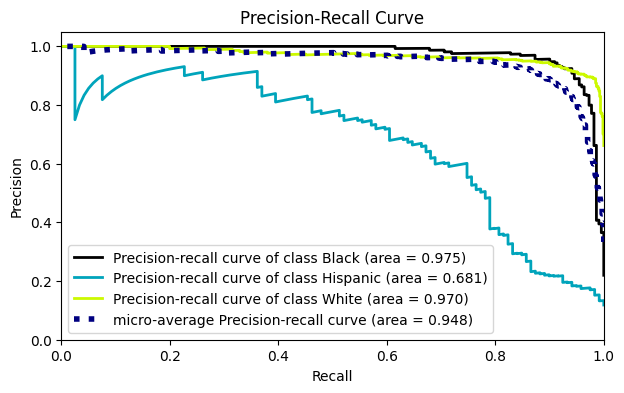

In [156]:
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_precision_recall

operations = [
    ('OrdinalEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(class_weight = 'balanced', C =5, solver ='liblinear',
                                    penalty = 'l2', 
                                    random_state = 101))
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [157]:
pd.get_dummies(y_test).values

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [158]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.681318271510991

In [159]:
y_pred = grid_search.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average = None, labels = ['Hispanic'])
log_recall = recall_score(y_test, y_pred, average = None, labels = ['Hispanic'])

print(log_AP)
print(log_precision)
print(log_recall)

0.681318271510991
[0.81012658]
[0.53781513]


## 2. SVC

### Vanilla SVC model

In [160]:
operations = [
    ('OneHotEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('svc', SVC(class_weight = 'balanced', random_state = 101))
]

svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [161]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[204   9   8]
 [  5  87  27]
 [ 16  78 572]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       221
    Hispanic       0.50      0.73      0.59       119
       White       0.94      0.86      0.90       666

    accuracy                           0.86      1006
   macro avg       0.78      0.84      0.80      1006
weighted avg       0.88      0.86      0.87      1006


Train_Set
[[ 832   29   25]
 [  16  406   52]
 [  53  322 2287]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       886
    Hispanic       0.54      0.86      0.66       474
       White       0.97      0.86      0.91      2662

    accuracy                           0.88      4022
   macro avg       0.81      0.88      0.83      4022
weighted avg       0.91      0.88      0.89      4022



# SVC Model Cross Validation

In [162]:
from sklearn.model_selection import cross_validate

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('svc', SVC())]

svc_model = Pipeline(steps = operations)

scores = cross_validate(svc_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, n_jobs = -1, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.887867
train_accuracy           0.899608
test_precision_macro     0.915058
train_precision_macro    0.930703
test_recall_macro        0.734476
train_recall_macro       0.754916
test_f1_macro            0.776044
train_f1_macro           0.798141
dtype: float64

# SVC Model Gridsearch

In [163]:
recall_Hispanic =  make_scorer(recall_score, pos_label='Hispanic', average=None, labels=["Hispanic"])

In [164]:
param_grid = {
    'svc__C': [0.01,0.1,0.3,1.0],
    'svc__gamma': ['scale', 'auto', 0.2],
    'svc__kernel': ['linear','rbf'],
    
}

In [165]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()),
              ('svc', SVC(class_weight = 'balanced',
                                              random_state = 42))]

pipe_model = Pipeline(steps = operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid=param_grid,
                              scoring=recall_Hispanic,
                              cv=10, 
                              n_jobs=-1, 
                              verbose=2,
                             return_train_score = True)

In [166]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.3, 1.0],
                         'svc__gamma': ['scale', 'auto', 0.2],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']),
             verbose=2)

In [167]:
svm_model_grid.best_params_

{'svc__C': 0.3, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [168]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=0.3, class_weight='balanced', kernel='linear',
                     random_state=42))])

In [169]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.770124
mean_train_score    0.831929
Name: 12, dtype: object

In [170]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[208   6   7]
 [  5  90  24]
 [ 22  74 570]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       221
    Hispanic       0.53      0.76      0.62       119
       White       0.95      0.86      0.90       666

    accuracy                           0.86      1006
   macro avg       0.79      0.85      0.81      1006
weighted avg       0.88      0.86      0.87      1006


Train_Set
[[ 830   34   22]
 [  19  391   64]
 [  59  317 2286]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       886
    Hispanic       0.53      0.82      0.64       474
       White       0.96      0.86      0.91      2662

    accuracy                           0.87      4022
   macro avg       0.80      0.87      0.83      4022
weighted avg       0.90      0.87      0.88      4022



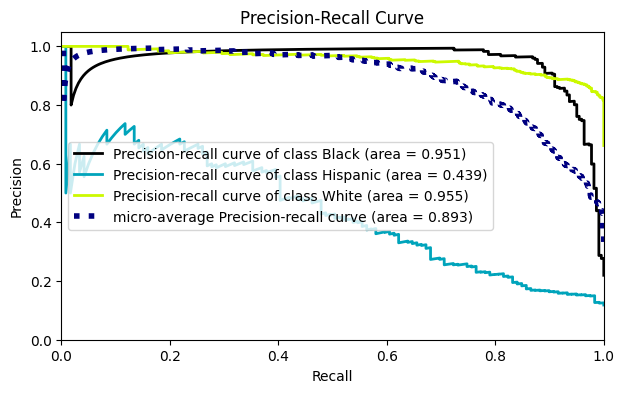

In [171]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced', kernel = 'linear',
                                              C = 0.01,
                                              random_state = 101))]


svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

decision_function = svc_model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test) # should not use predict_proba  . should use decision func.
    
plot_precision_recall(y_test, decision_function)
plt.show();

## 3. RF

### Vanilla RF Model

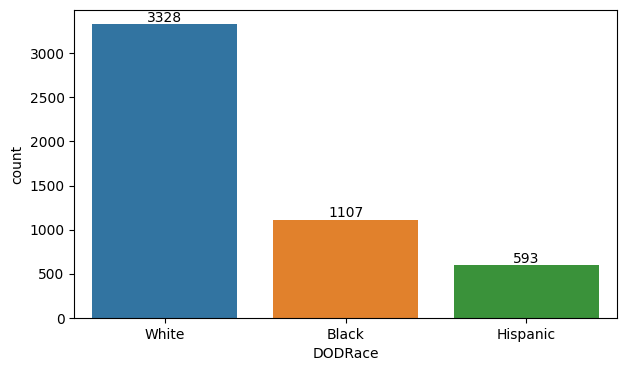

In [183]:
ax = sns.countplot(x="DODRace", data = df)
ax.bar_label(ax.containers[0]);

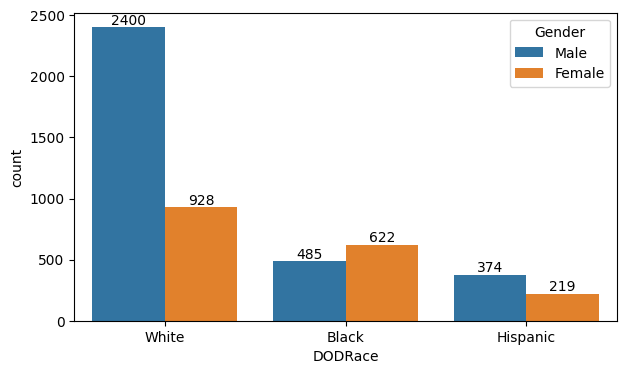

In [182]:
ax = sns.countplot(x="DODRace", data = df, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

In [184]:
X = df.drop('DODRace', axis = 1)
y = df.DODRace

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [186]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [192]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [193]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model_rf = Pipeline(steps=operations)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [194]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [195]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[169   2  50]
 [ 16   6  97]
 [ 16   3 647]]
              precision    recall  f1-score   support

       Black       0.84      0.76      0.80       221
    Hispanic       0.55      0.05      0.09       119
       White       0.81      0.97      0.89       666

    accuracy                           0.82      1006
   macro avg       0.73      0.60      0.59      1006
weighted avg       0.79      0.82      0.77      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       886
    Hispanic       1.00      1.00      1.00       474
       White       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [196]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_macro",
                                 "recall_macro",
                                 "f1_macro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy            0.819250
train_accuracy           1.000000
test_precision_macro     0.763186
train_precision_macro    1.000000
test_recall_macro        0.596889
train_recall_macro       1.000000
test_f1_macro            0.603997
train_f1_macro           1.000000
dtype: float64

In [198]:
operations_rf = [("ColumnTransformer", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                  random_state=42))]


rf_model = Pipeline(steps=operations_rf)

scores = cross_validate(rf_model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.081583
train_f1_Hispanic           1.000000
test_precision_Hispanic     0.588333
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.044105
train_recall_Hispanic       1.000000
dtype: float64

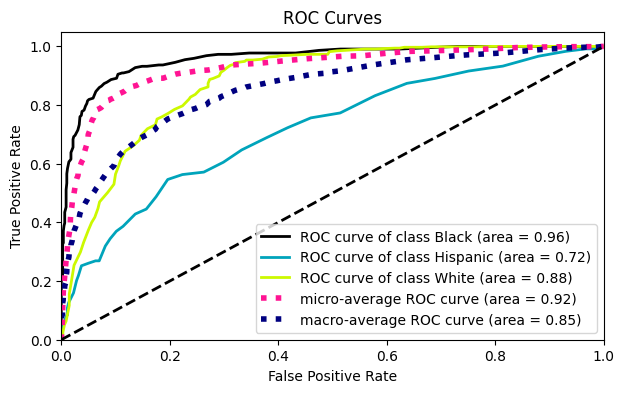

In [199]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### RF Model GridsearchCV

In [200]:
recall_Hispanic =  make_scorer(recall_score, pos_label='Hispanic', average=None, labels=["Hispanic"])

In [201]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state= 42))]

pipe_model = Pipeline(steps=operations)

In [202]:
# Define the parameter grid with the correct prefixes
param_grid = {'RF_model__n_estimators':[300 , 400, 500], 
             'RF_model__max_depth':[2, None],
             'RF_model__min_samples_split':[5, 10, 20],
             'RF_model__min_samples_leaf': [100],
             'RF_model__max_samples':[0.1, 0.2, 0.3]}

In [203]:
# Create the GridSearchCV object
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             scoring = recall_Hispanic,  
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True,
                             verbose=2)

In [204]:
# Fit the GridSearchCV object
rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClass...
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, None],
                         'RF_model__max_samples': [0.1, 0.2, 0.3],
                         'RF_model__min_samples_leaf': [100],
                         'RF_model__min_samples_split': [5, 10, 20],
                         'RF_model__n_estimators': [300, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']),
             verbose=2)

In [205]:
rf_grid_model.best_params_

{'RF_model__max_depth': None,
 'RF_model__max_samples': 0.2,
 'RF_model__min_samples_leaf': 100,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 500}

In [206]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, 
                                            ['mean_test_score', 'mean_train_score']]

mean_test_score     0.631294
mean_train_score    0.654954
Name: 38, dtype: object

In [207]:
rf_grid_model.best_estimator_

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_samples=0.2, min_samples_leaf=100,
                                        min_samples_split=5, n_estimators=500,
                                        random_state=42))])

In [208]:
rf_grid_model.best_score_

0.6312943262411348

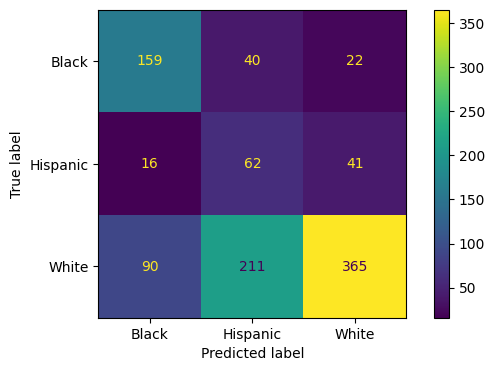

In [209]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test);

In [210]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[159  40  22]
 [ 16  62  41]
 [ 90 211 365]]
              precision    recall  f1-score   support

       Black       0.60      0.72      0.65       221
    Hispanic       0.20      0.52      0.29       119
       White       0.85      0.55      0.67       666

    accuracy                           0.58      1006
   macro avg       0.55      0.60      0.54      1006
weighted avg       0.72      0.58      0.62      1006


Train_Set
[[ 659  127  100]
 [  57  307  110]
 [ 255  879 1528]]
              precision    recall  f1-score   support

       Black       0.68      0.74      0.71       886
    Hispanic       0.23      0.65      0.34       474
       White       0.88      0.57      0.69      2662

    accuracy                           0.62      4022
   macro avg       0.60      0.66      0.58      4022
weighted avg       0.76      0.62      0.66      4022



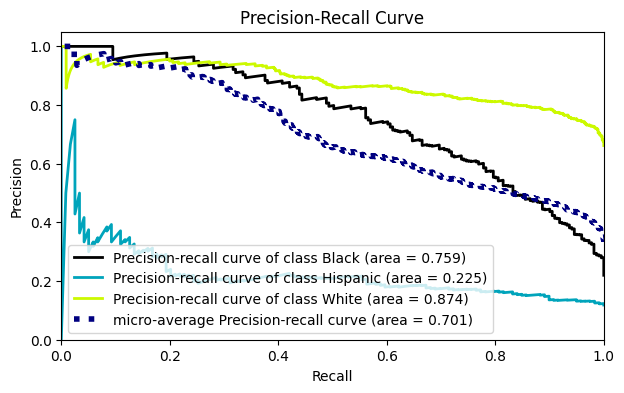

In [211]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth= None,
                                                     max_samples= 0.3,
                                                     min_samples_leaf= 100,
                                                     min_samples_split= 5,
                                                     n_estimators= 300, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [212]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.12856623744508497

In [213]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


print(rf_AP)
print(rf_precision)
print(rf_recall)

0.12856623744508497
[0.19808307]
[0.5210084]


## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
#!pip install xgboost==0.90

In [223]:
from xgboost import XGBClassifier

In [218]:
xgb_model = XGBClassifier(random_state=101)

In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [229]:

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that combines preprocessing and the XGBoost model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Train the pipeline
pipeline.fit(X_train, y_train_encoded)

# Make predictions
y_pred = pipeline.predict(X_test)

# Decode predictions
y_pred_decoded = le.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8817097415506958


### XGBoost Model GridsearchCV

---
---

<a id="part_3"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> Multiclass Classification</p>

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

<a id="part_31"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > i. Import Libraries </p> 

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

In [ ]:
Import libraries
Implement SVM Classifer
Implement Decision Tree Classifier
Implement Random Forest Classifer
Implement XGBoost Classifer
Compare The Models

<a id="part_32"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > ii. Implement SVM Classifer </p> 

<a id="part_33"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > iii. Implement Decision Tree Classifier </p> 

<a id="part_34"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > iv. Implement Random Forest Classifer </p> 

<a id="part_35"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > v. Implement XGBoost Classifer </p> 

<a id="part_36"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > vi. Compare The Models</p> 

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

<a id="part_4"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> SMOTE</p>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

<a id="part_41"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > Imbalance Learning Techniques</p>  

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

In [1]:
from sckitplot.metrics import plot_roc, precisio_recall_curve

ModuleNotFoundError: No module named 'sckitplot'

<a id="part_5"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> SHAP</p>
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

<a id="part_51"></a>
## <p style= "background-color:#3399FF; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:left;" > Feature selection with SHAP</p>  

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___